## **PRACTICAL SESSION 1** — Deep Learning for predictive maintenance

The dataset used is the **AI4I 2020** Predictive Maintenance Dataset, which contains 10,000 instances of industrial sensor data. Each instance represents the operating condition of a machine and is associated with a label indicating whether a failure has occurred and, if so, what type of failure it is.

The 5 possible labels are:



*   **TWF**: Tool Wear Failure
*   **HDF**: Heat Dissipation Failure
*   **PWF**: Power Failure
*   **OSF**: Overstrain Failure
*   **RNF**: Random Failure


The data is available on eCAMPUS as CSV file called: "ai4i2020.csv"



## **PRACTICAL SESSION Goal** — Ceate a deep leanring model allowing to realize a predictive maintenance mission

## **1 - Analysis of the dataset**



All libraries used ***SHOULD BE PLACED*** in the code cell below

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pour le prétraitement et le split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pour la partie deep learning
import tensorflow as tf

print("Librairies importées.")

Librairies importées.


**QUESTION:** Load dataset and display some lines of the csv file.

In [4]:
# Adaptez le chemin si nécessaire
df = pd.read_csv('ai4i2020.csv')
print("Dataset AI4I chargé avec succès.")

# Aperçu rapide
print("Aperçu du dataset :")
print(df.head())
print("\nDescription statistique :")
print(df.describe())

Dataset AI4I chargé avec succès.
Aperçu du dataset :
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0  

**QUESTION:** Display the distribution of machine failures and non-failures with a bar graph.


Répartition des classes (failures vs non-failures) :
Machine failure
0    9661
1     339
Name: count, dtype: int64


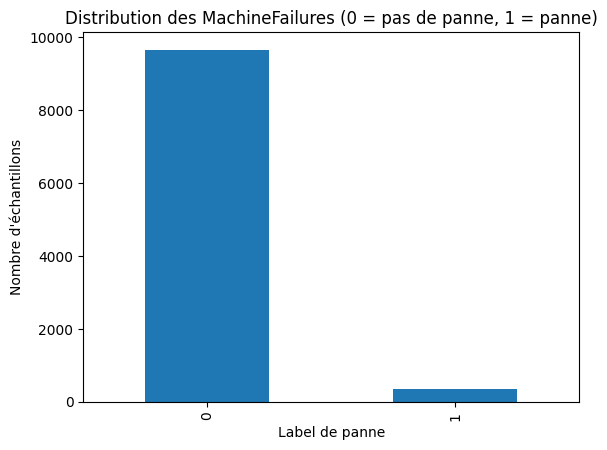

In [5]:
failure_counts = df['Machine failure'].value_counts()
print("\nRépartition des classes (failures vs non-failures) :")
print(failure_counts)

# Bar chart
plt.figure()
failure_counts.plot(kind='bar')
plt.title("Distribution des MachineFailures (0 = pas de panne, 1 = panne)")
plt.xlabel("Label de panne")
plt.ylabel("Nombre d'échantillons")
plt.show()

**ANALYSIS QUESTION:** What do you observe?

"Write here your response"

**ANALYSIS QUESTION:** What will be the consequence of this phenomenon on the model's learning?

"Write here your response"

**QUESTION:** Create a bar chart showing the distribution of different failure types (TWF, HDF, PWF, OSF, RNF). Display the exact values above each bar in the chart."

Information sur les colonnes (noms et types) :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000

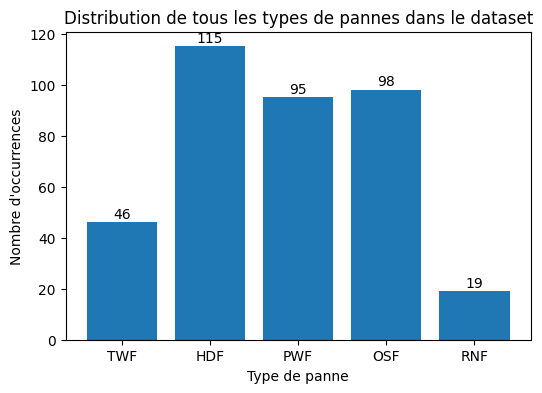

In [6]:
# =========================================
# BLOC 1 (complément) : Infos sur les colonnes
# =========================================

print("Information sur les colonnes (noms et types) :")
df.info()  # Affiche nom, type et nombre de valeurs non-nulles pour chaque colonne

# =========================================
# Distribution des différents types de pannes
# =========================================

# 1. Afficher la distribution TWF, HDF, PWF, OSF, RNF dans tout le dataset
failure_cols = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# On suppose que dans votre dataset, ces colonnes sont binaires (0 ou 1)
# On fait simplement la somme pour connaître le nombre d'occurrences de chaque type de panne
all_failure_counts = df[failure_cols].sum()

print("\nDistribution des différents types de pannes (TWF, HDF, PWF, OSF, RNF) :")
print(all_failure_counts)

# Bar chart avec valeurs au-dessus des barres
plt.figure(figsize=(6,4))
bars = plt.bar(all_failure_counts.index, all_failure_counts.values)
plt.title("Distribution de tous les types de pannes dans le dataset")
plt.xlabel("Type de panne")
plt.ylabel("Nombre d'occurrences")

# Ajouter le nombre exact au-dessus de chaque barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f"{int(height)}", ha='center', va='bottom')

plt.show()


**ANALYSIS QUESTION:** What do you observe?

"Write here your response"

**QUESTION:** Create a bar chart showing the distribution of failure types (TWF, HDF, PWF, OSF, RNF) among machines that experienced a failure (Machine failure == 1). Additionally, add a "No Specific Failure" category to count cases where a machine failed but no specific failure type was recorded. Display the exact values above each bar in the chart."


Distribution des types de pannes parmi les machines en panne uniquement :
TWF                     46
HDF                    115
PWF                     95
OSF                     98
RNF                      1
No Specific Failure      9
dtype: int64


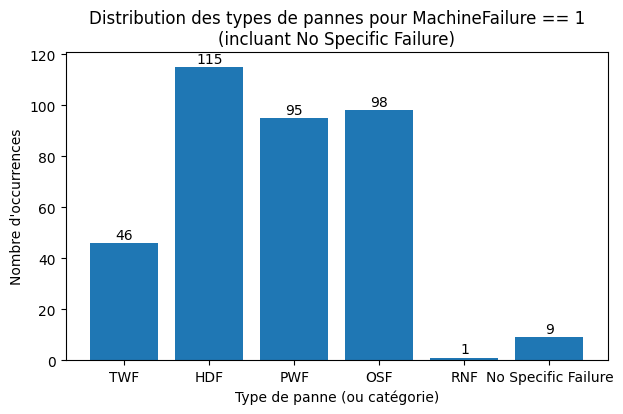

In [7]:
# =========================================
# Distribution des types de pannes UNIQUEMENT pour les machines en panne
# + Comptage "No Specific Failure"
# =========================================

# Filtrer uniquement les lignes où 'MachineFailure' == 1
df_failure_only = df[df['Machine failure'] == 1]

# Compter les pannes (TWF, HDF, PWF, OSF, RNF) parmi ces machines
failure_counts = df_failure_only[failure_cols].sum()

# Calculer le nombre de machines en panne sans aucun type de panne spécifique
# (c'est-à-dire TWF=HDF=PWF=OSF=RNF=0)
no_specific_failure = (df_failure_only[failure_cols].sum(axis=1) == 0).sum()


# Créer une série pandas combinée avec la catégorie "No Specific Failure"
failure_counts_extended = failure_counts.copy()
failure_counts_extended['No Specific Failure'] = no_specific_failure

print("\nDistribution des types de pannes parmi les machines en panne uniquement :")
print(failure_counts_extended)

# Bar chart
plt.figure(figsize=(7,4))
bars2 = plt.bar(failure_counts_extended.index, failure_counts_extended.values)
plt.title("Distribution des types de pannes pour MachineFailure == 1\n(incluant No Specific Failure)")
plt.xlabel("Type de panne (ou catégorie)")
plt.ylabel("Nombre d'occurrences")

# Ajouter les valeurs sur chaque barre
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f"{int(height)}", ha='center', va='bottom')

plt.show()

In [8]:
df.columns.tolist()

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

**ANALYSIS QUESTION:** What do you obsrve comapred to the previous question ? What can you conclude?

"Write your response here"

**QUESTION:** Display the names of the different columns in the dataset with their respective data types.

In [9]:
print("Noms des colonnes et leurs types respectifs :")
print(df.dtypes)

Noms des colonnes et leurs types respectifs :
UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object


**ANALYSIS QUESTION:** To train the model, what will be the inputs and outputs (What are the names of the columns that you will use?)? Justify your response.
Remember, you want to predict if the machine will fail, and if so, what kind of failure. You need to yse previous results to jsurtify your response.

"Write your response here"

## **2- Train model Without balancing the dataset**

---



In this section, you must build and train a model without rebalancing the dataset.

**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

In [48]:
# Définir X et y en fonction de vos colonnes
# Exemple : une colonne 'MachineFailure' = label binaire (0 ou 1)
X = df[[
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']]
y = df[['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']]
print(y.info())
print(X.dtypes)
"""
X = pd.get_dummies(df[[
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']], columns=["Type"], dtype=np.float32)"""



# Séparation en jeu d'entraînement (train) et jeu de test (test)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,    # 20% pour le test, par exemple
    random_state=42
)

# Afficher le nombre d'éléments dans chaque ensemble
print(f"Nombre d'éléments dans X_train : {len(X_train)}")
print(f"Nombre d'éléments dans y_train : {len(y_train)}")
print(f"Nombre d'éléments dans X_test  : {len(X_test)}")
print(f"Nombre d'éléments dans y_test  : {len(y_test)}")




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Machine failure  10000 non-null  int64
 1   TWF              10000 non-null  int64
 2   HDF              10000 non-null  int64
 3   PWF              10000 non-null  int64
 4   OSF              10000 non-null  int64
 5   RNF              10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB
None
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
dtype: object
Nombre d'éléments dans X_train : 8000
Nombre d'éléments dans y_train : 8000
Nombre d'éléments dans X_test  : 2000
Nombre d'éléments dans y_test  : 2000


**QUESTION** Code below the model architecture

**QUESTION** Code below the algorithms allowing to train model

**WARNING!** You need to plot the training and test accuracy and loss to check if our model is overfitting

In [61]:
# (1) DEFINE THE ARCHITECTURE OF MY MODEL
#first, I define all the layers and the way they are connected
inputs = tf.keras.Input(shape=(X_train.shape[1],))  # Adapter au bon nombre de colonnes
x = tf.keras.layers.Dense(20, activation='tanh')(inputs)  # Pas besoin de Flatten
outputs = tf.keras.layers.Dense(6, activation='sigmoid')(x)  # Multi-label -> sigmoid

my_mlp_model = tf.keras.Model(inputs=inputs, outputs=outputs, name="my_mlp_model")
my_mlp_model.summary()


# (2) DEFINE THE TRAINING HYPER-PARAMETERS WITH THE "COMPILE" METHOD:
'''
(1) Set the "optimizer" [pick 'adam', 'sgd' or 'rmsprop']
(2) Set the loss [cf. lesson #3, we pick the categorical cross-entropy]
(3) Set the final performance metric to evaluate the model
'''

my_mlp_model.compile(optimizer='adam',
                     loss='binary_crossentropy',  # Car multi-label
                     metrics=['binary_accuracy'])  # Ou 'accuracy' si tu veux rester dessus




# (3) NOW, LET'S TRAIN ON MY DATA WITH THE "FIT" METHOD
'''
(1) Set the number of epochs
(2) Set the size of the (mini)batch
(3) Set the training dataset ==> here, X_train with Y_train
(4) Set the validation dataset (X_val, Y_val)
'''
nb_epochs=10
batch_size=100
training_history = my_mlp_model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=nb_epochs,batch_size=batch_size)

#COMPUTE THE ACCURACY ON THE TRAINING AND TEST SETS
loss_train, acc_train = my_mlp_model.evaluate(X_train, y_train, batch_size=batch_size)
loss_test, acc_test = my_mlp_model.evaluate(X_test, y_test, batch_size=batch_size)

print("Performance on the TRAIN set, ACCURACY=",acc_train)
print("Performance on the TEST set, ACCURACY=",acc_test)

Model: "my_mlp_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)          │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 20)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 6)                   │             126 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 246 (984.00 B)

 Trainable params: 246 (984.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - binary_accuracy: 0.3594 - loss: 0.8170 - val_binary_accuracy: 0.9887 - val_loss: 0.3740
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9880 - loss: 0.3112 - val_binary_accuracy: 0.9889 - val_loss: 0.1827
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9874 - loss: 0.1665 - val_binary_accuracy: 0.9889 - val_loss: 0.1207
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9889 - loss: 0.1129 - val_binary_accuracy: 0.9889 - val_loss: 0.0940
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9875 - loss: 0.0945 - val_binary_accuracy: 0.9889 - val_loss: 0.0807
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9881 - loss: 0.0811 - val_binary_accuracy: 0.9889 - val_loss: 0.0729
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9886 - loss: 0.0726 - val_binary_accuracy: 0.9889 - val_loss: 0.0681
Epoch 8/10
80/80 ━━━

In [66]:
print(training_history.history)

{'binary_accuracy': [0.5908750295639038, 0.9881044030189514, 0.9879376292228699, 0.9879373908042908, 0.9879373908042908, 0.9879376292228699, 0.9879375100135803, 0.9879375696182251, 0.9879376292228699, 0.9879375100135803], 'loss': [0.648202121257782, 0.2623947262763977, 0.14970369637012482, 0.10875405371189117, 0.08974708616733551, 0.0795564278960228, 0.07354699075222015, 0.06957432627677917, 0.06704498082399368, 0.06524571776390076], 'val_binary_accuracy': [0.9886667728424072, 0.98891681432724, 0.98891681432724, 0.98891681432724, 0.98891681432724, 0.98891681432724, 0.98891681432724, 0.98891681432724, 0.98891681432724, 0.98891681432724], 'val_loss': [0.3739641308784485, 0.18271632492542267, 0.12066835165023804, 0.09404642879962921, 0.08065624535083771, 0.07287857681512833, 0.06812173128128052, 0.06490519642829895, 0.06275306642055511, 0.061398811638355255]}


In [64]:
def display_training_curves(training_history):
  # display loss
  plt.plot(training_history.history['loss'],label='loss')
  plt.plot(training_history.history['val_loss'], label='val_loss')
  plt.xlabel("epoch")
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
  plt.show()
  #display accuracy
  plt.plot(training_history.history['binary_accuracy'],label='acc')
  plt.plot(training_history.history['val_binary_accuracy'], label='val_acc')
  plt.xlabel("epoch")
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
  plt.show()

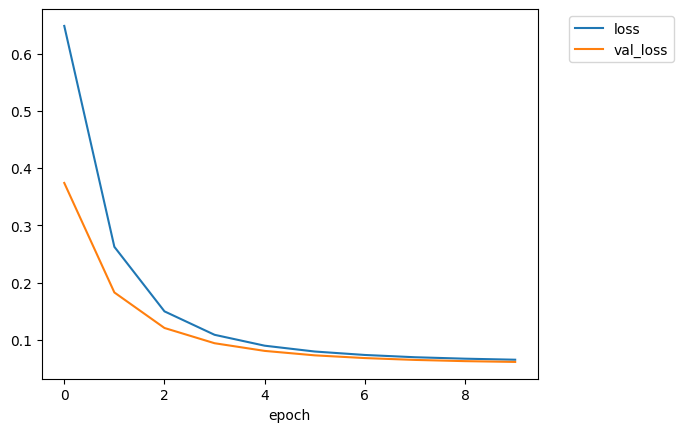

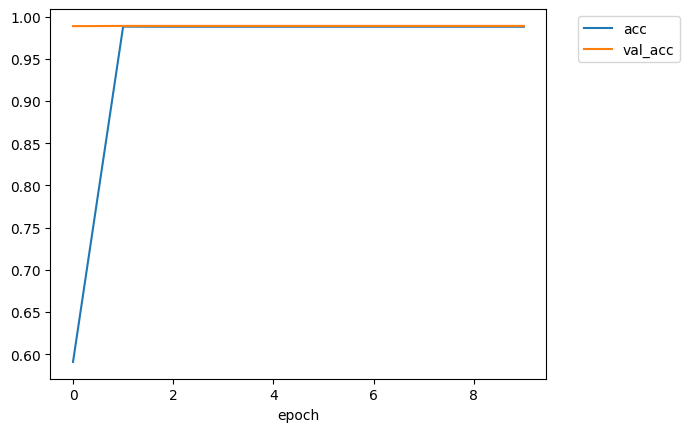

In [65]:
display_training_curves(training_history )

il est normal que on est val_acc presque à 1 car on va voir dans le report avec le recall de la classe mojoritaire, celle où ya pas d'erreur, que on est toujours à un et presque à 0 pour toutes les autres classes. En conclusion juste observer la loss et l'accuracy n'est suffisant.

**QUESTION** Plot the confusion matrix and the classification report

**Tips:**

*   classification report link

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   Matrix confusion

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html





63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step
Classification Report:
                 precision    recall  f1-score   support

Machine failure       0.00      0.00      0.00        61
            TWF       0.00      0.00      0.00        11
            HDF       0.00      0.00      0.00        17
            PWF       0.00      0.00      0.00        20
            OSF       0.00      0.00      0.00        18
            RNF       0.00      0.00      0.00         6

      micro avg       0.00      0.00      0.00       133
      macro avg       0.00      0.00      0.00       133
   weighted avg       0.00      0.00      0.00       133
    samples avg       0.00      0.00      0.00       133



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

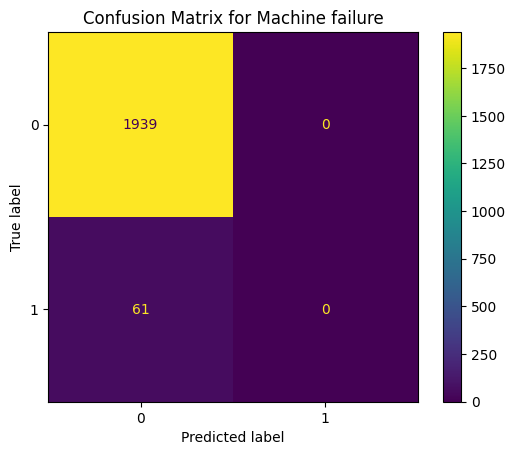

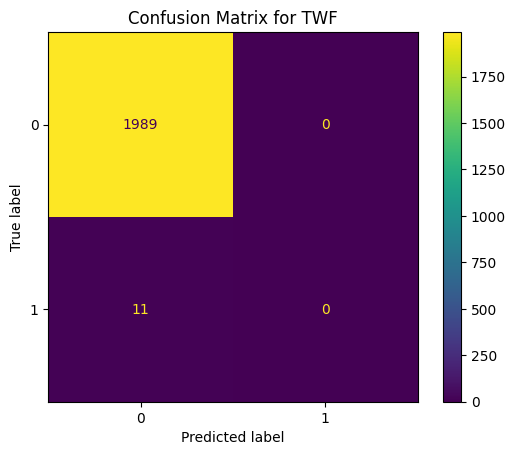

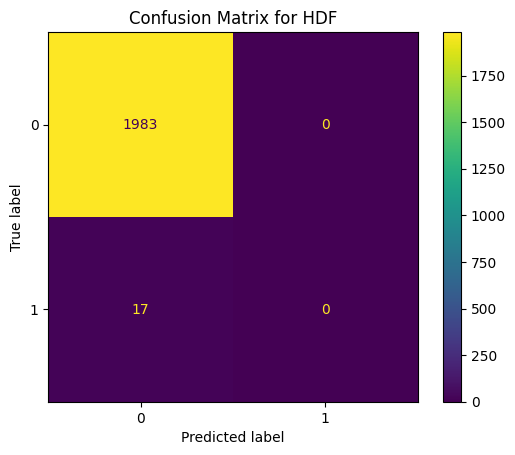

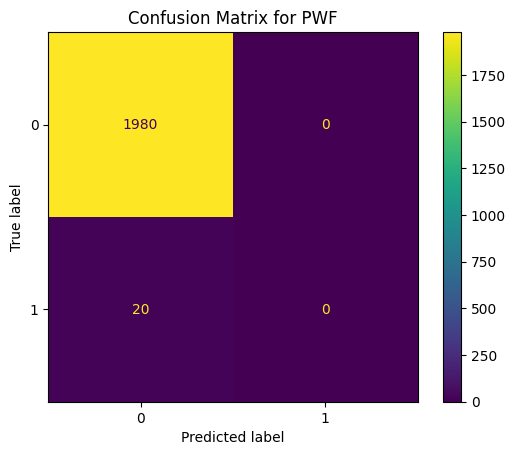

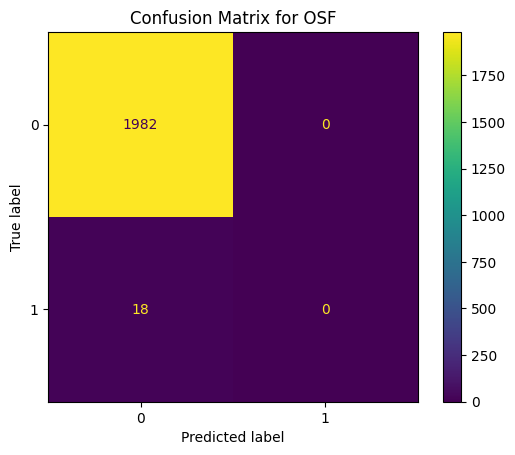

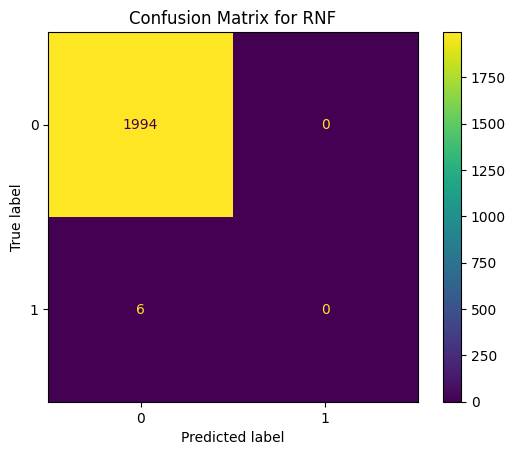

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Prédictions du modèle
y_pred = my_mlp_model.predict(X_test).astype(int)

# Vérification des formats
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.values
if isinstance(y_pred, pd.DataFrame):
    y_pred = y_pred.values

class_names = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Matrices de confusion pour chaque label
for idx, label in enumerate(class_names):
    cm = confusion_matrix(y_test[:, idx], y_pred[:, idx])  # Ici plus d'erreur
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot()
    plt.title(f"Confusion Matrix for {label}")
    plt.show()


**ANALYSIS QUESTION** What do you observe? What can you conclude?

Aucune panne n'est jamais prédite car il n'y a pas assez de de données avec des erreurs machines donc il estime qu'il n'y a jamais de panne, il faut donc faire de l'undersampling pour supprimer des données sans pannes qui se ressemblent et de l'oversampling pour ajouter des données avec erreur de manière artificielle.

## **3- Train model With balancing the dataset**

---

 Methods for rebalancing a dataset:


*   Use oversampling techniques (e.g., SMOTE) to generate synthetic data for minority classes


> https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html



*   Apply undersampling techniques (e.g., random undersampling, Tomek Links, Edited Nearest Neighbors) to reduce the majority class size



> https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html



*   Use class weighting during model training to penalize errors on minority classes



> https://www.tensorflow.org/tutorials/structured_data/imbalanced_data?hl=fr


**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

**ANALYSIS QUESTION:** Explain the choices you made to balance the dataset.

"Write your response here"

**QUESTION:** Code below the model architecture


**TIP:** It could be interesting to keep it the same as before

**QUESTION** Code below the algorithms allowing to train model


**QUESTION** Plot the confusion matrix and the classification report

**ANALYSIS QUESTION** What do you observe? What can you conclude?

"Write your response here"